In [1]:
import math as math

import numpy as np

In [30]:
data = np.genfromtxt('data_class10.csv', delimiter=',')

print(data.shape)
n = data.shape[0]
print(n)

(1200, 2)
1200


In [3]:
k = 6

In [4]:
# Option 1
# Takes 6 random index from the dataset
# center_idx = np.random.choice(n, k, replace=False)
# 
# centers = list()

# for i in center_idx:
#     centers.append(data[i].tolist())

In [5]:
# Option 2
centers = data[np.random.choice(n, k, replace=False)]

In [6]:
print(centers)

[[6.84258468e+00 1.25897997e-02]
 [1.34824960e+01 6.10314211e+00]
 [1.23212717e+01 5.30008280e+00]
 [5.86190099e-01 9.90025161e+00]
 [2.53371763e+00 1.77256622e+00]
 [8.65450036e+00 5.74737167e-01]]


In [7]:
def calc_distance(a, b):
    distance = 0
    for x1, x2 in zip(a, b):
        distance += (x1 - x2) ** 2
    return math.sqrt(distance)

In [8]:
for s in data:
    idx = -1
    min = 999
    for i, c in enumerate(centers):
        distance = calc_distance(s, c)
        if min > distance:
            min = distance
            idx = i

In [9]:
data[0]

array([0.20987452, 2.00290685])

In [10]:
centers[0]

array([6.84258468, 0.0125898 ])

In [11]:
data[0] - centers[0]

array([-6.63271016,  1.99031705])

In [12]:
math.sqrt(((data[0] - centers[0]) ** 2).sum())

6.924897545836653

In [13]:
math.sqrt(((data[0] - centers[1]) ** 2).sum())

13.891522921575309

In [14]:
(data-centers[0]).shape

(1200, 2)

In [15]:
(data-centers[0]) ** 2

array([[4.39928441e+01, 3.96136195e+00],
       [2.41800366e+01, 3.13191378e+00],
       [3.54885148e+01, 1.65921215e-02],
       ...,
       [4.87250136e+01, 2.25269905e+01],
       [4.04435649e+01, 1.77308761e+01],
       [3.26161689e+01, 2.27076971e+01]])

In [16]:
((data-centers[0]) ** 2).sum(axis=1) ** 0.5

array([6.92489755, 5.22608365, 5.95861619, ..., 8.44109022, 7.62721712,
       7.43800148])

In [17]:
distance = np.zeros((n, k))

for i in range(k):
    # Center to distance
    distance[:,i] = ((data-centers[i]) ** 2).sum(axis=1) ** 0.5

In [18]:
type(distance)

numpy.ndarray

In [19]:
distance

array([[ 6.92489755, 13.89152292, 12.55218349,  7.90630556,  2.33523096,
         8.56454169],
       [ 5.22608365, 12.33852406, 10.97504806,  8.22764105,  0.60853105,
         6.83672792],
       [ 5.95861619, 13.93664871, 12.54559926,  9.76343606,  2.31900461,
         7.7812151 ],
       ...,
       [ 8.44109022,  1.38672463,  1.59620348, 14.20017239, 11.67749436,
         6.64976058],
       [ 7.62721712,  1.90054395,  1.39109102, 13.83431049, 10.94628518,
         5.83039068],
       [ 7.43800148,  1.61838564,  0.57159743, 13.01763793, 10.46090809,
         5.73318861]])

In [20]:
np.argmin(distance, axis = 1).shape

(1200,)

In [21]:
closest = np.argmin(distance, axis = 1)

In [22]:
closest

array([4, 4, 4, ..., 1, 2, 2], dtype=int64)

In [23]:
closest==0

array([False, False, False, ..., False, False, False])

In [24]:
for i in range(k):
    centers[i] = data[closest==i].mean(axis=0)

In [25]:
centers

array([[ 6.88583929,  0.81656824],
       [13.1835122 , 10.86209868],
       [12.16274814,  4.69472392],
       [ 1.27986893,  7.86662348],
       [ 2.67810671,  2.76040713],
       [ 8.33452154,  1.32724481]])

In [26]:
old_closest = closest.copy()

In [27]:
# if all(old_closest == closest):
#     break

In [28]:
from matplotlib import pyplot as plt

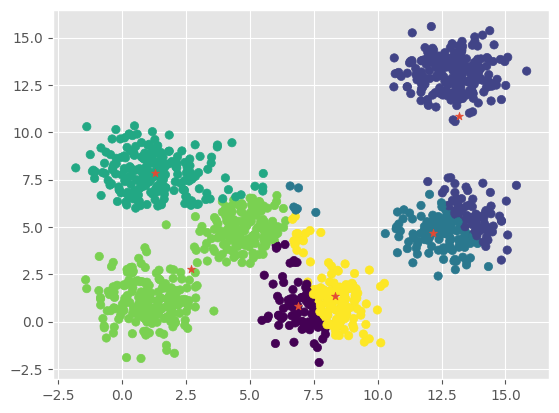

In [29]:
plt.style.use('ggplot')
plt.scatter(data[:,0],data[:,1],c=closest)
plt.scatter(centers[:,0],centers[:,1],marker='*')
plt.show()